In [ ]:
%load_ext autoreload
%autoreload 2

In [43]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)

import matplotlib.pyplot as plt
plt.style.use('bmh')


fair_loaded_init_prob = [1/2,1/2]
fair_loaded_transition_prob = [[0.95, 0.05],
                               [0.1, 0.9]]
die_number_emision_prob = [
    {1:1/6,2:1/6,3:1/6,4:1/6,5:1/6,6:1/6},
    {1:1/10,2:1/10,3:1/10,4:1/10,5:1/10,6:1/2}
]

with open('data/casino.txt', 'r') as f:
    str_data = list(f.readline())[:-1]
    data = list(map(int,str_data))
    f.readline()
    str_target = list(f.readline())
    func = lambda x: 0 if x == 'F' else 1
    target = list(map(func, str_target))

# Test 1: Viterby algorithm

In [5]:
from scripts import viterby
prediction = viterby(
    observations=data, 
    init_prob=fair_loaded_init_prob,
    transition_prob=fair_loaded_transition_prob,
    emision_prob=die_number_emision_prob
)

accuracy = (np.array(prediction)==np.array(target)).sum()/300
print(f'Accuracy: {round(accuracy,2)}')
pd.DataFrame([prediction,target], index = ['prediction', 'target'])

Accuracy: 0.86


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
prediction,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0
target,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0


# Test 2: Forward algorithm

In [6]:
from scripts import forward


for k, i in enumerate(range(1, 5)):
    sequence = data[:i]
    prediction = forward(
        observations=sequence, 
        init_prob=fair_loaded_init_prob,
        transition_prob=fair_loaded_transition_prob,
        emision_prob=die_number_emision_prob
    )
    print(f'Test 2.{k+2}')
    print(f'Sequence: {sequence}')
    print(f'Probability: {round(prediction*100,3)} %')
    print()
    

Test 2.2
Sequence: [3]
Probability: 13.333 %

Test 2.3
Sequence: [3, 1]
Probability: 1.894 %

Test 2.4
Sequence: [3, 1, 5]
Probability: 0.282 %

Test 2.5
Sequence: [3, 1, 5, 1]
Probability: 0.043 %



# Test 3: Posterior decoding

<AxesSubplot:xlabel='Time', ylabel='Probability of a fair die'>

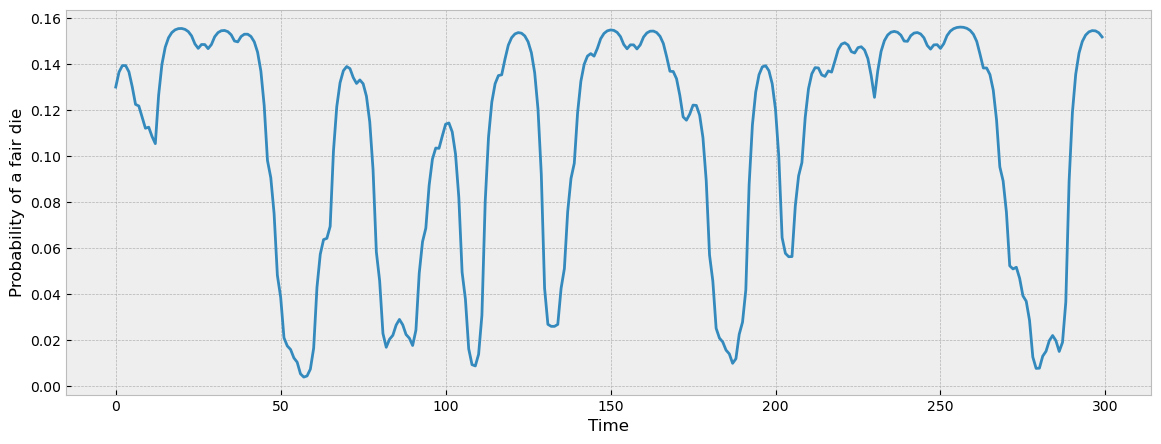

In [45]:
from scripts import posterior_decoding
import matplotlib.pyplot as plt


prediction = posterior_decoding(
    observations=data, 
    init_prob=fair_loaded_init_prob,
    transition_prob=fair_loaded_transition_prob,
    emision_prob=die_number_emision_prob
)

result = pd.DataFrame(prediction)
result.plot(kind = 'line', figsize = (14,5), legend=False, xlabel = 'Time',ylabel='Probability of a fair die')

# Test 4: Parameter estimation (Baum - Welch algorythm)

In [33]:
from scripts import baum_welch

np_data = np.array(data)-1
A_init = np.array([[0.6, 0.4],
                   [0.1, 0.9]])
B_init = np.array([[1/6,1/6,1/6,1/6,1/6,1/6],
                   [2/15,2/15,2/15,2/15,2/15,1/3]])

baum_welch(
    observations=np_data,
    n_iter= 1000,
    A = A_init,
    B = B_init
)

  0%|          | 0/1000 [00:00<?, ?it/s]

{'Transition': array([[0.911591  , 0.088409  ],
        [0.15103613, 0.84896387]]),
 'Emission': array([[0.1401602 , 0.1793289 , 0.1868823 , 0.16120515, 0.16950317,
         0.16292029],
        [0.1212803 , 0.07978209, 0.12175692, 0.05646951, 0.08791127,
         0.5327999 ]])}